In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



In [7]:
full_ld_df = pd.read_csv("data\processed_loan_data.csv", low_memory = True)


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kevin\AppData\Local\Temp\ipykernel_42232\636758573.py:1: SyntaxWarning: invalid escape sequence '\p'
  full_ld_df = pd.read_csv("data\processed_loan_data.csv", low_memory = True)


In [8]:


# Load preprocessed dataset (assuming a DataFrame `df`)
# Example: df = pd.read_csv("preprocessed_loans.csv")

features = ["LOAN_AMOUNT", "EMPLOYEE_COUNT", "IS_LOW_DOC", 
            "CHARGE_OFF_AMOUNT", "UNRATE", "PERCENTAGE_EXPOSURE"]
X = full_ld_df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


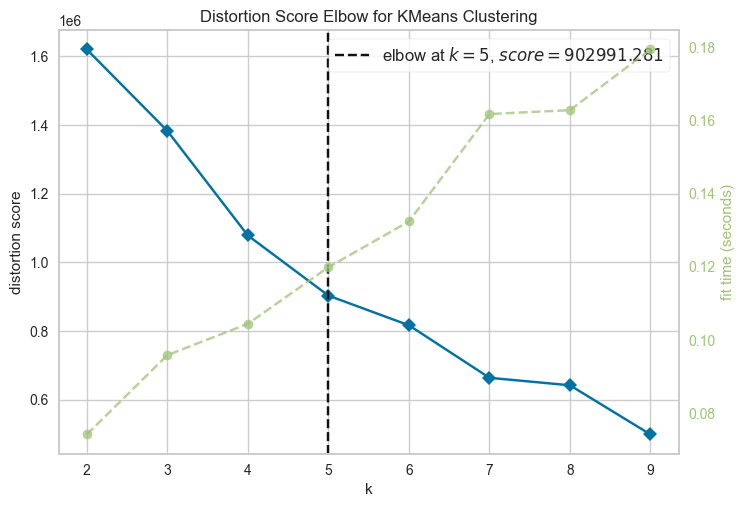

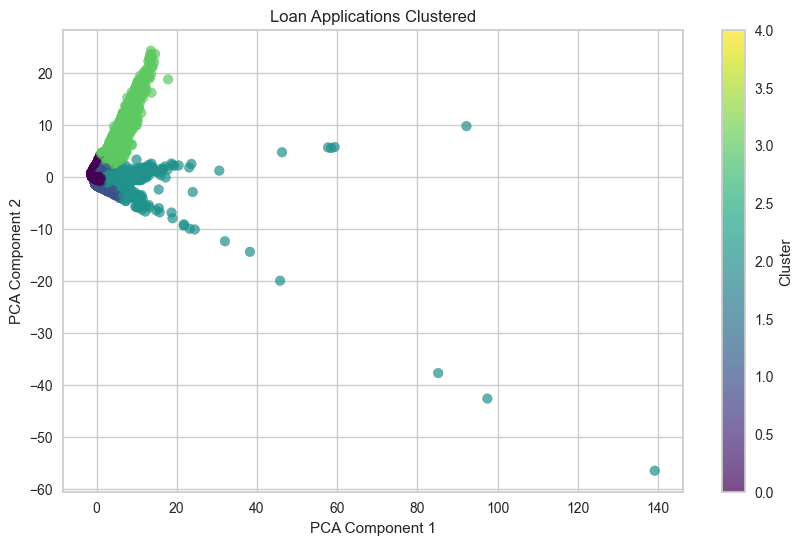

In [ ]:

# Determine optimal K using the Elbow Method
visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()

# Select optimal number of clusters
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=5)
full_ld_df["Cluster"] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=full_ld_df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Loan Applications Clustered")
plt.colorbar(label="Cluster")
plt.show()
sample_borrowers = full_ld_df.groupby("Cluster").first().reset_index()



In [12]:
sample_borrowers.head(10)


,Cluster,BORROWER_NAME,STATE,ZIP,BANK,BANK_STATE,INDUSTRY_ID,APPROVAL_DATE,APPROVAL_YEAR,TERM,...,GDP,MORTGAGE_30_US_FIXED,UNRATE,INDPRO_INDEX,UMCSENT_INDEX,CSUSHPINSA_INDEX,CP_INDEX,FEDFUNDS_RATE,EXPOSURE,PERCENTAGE_EXPOSURE
0,0,"KID'S TIME, INC.",IL,60618,BANK OF AMERICA NATL ASSOC,IL,624410,1994-06-03,1994,84,...,7287.23650,8.380769,6.100000,68.713433,92.266667,79.469083,438.35075,4.201667,6000.0,0.10
1,1,STARZ LIMOUSINE SERVICES,TX,77479,BANK OF AMERICA NATL ASSOC,NC,485320,2003-03-07,2003,84,...,11456.44950,5.826981,5.991667,91.142117,87.625000,133.741750,776.82075,1.127500,-10000.0,-2.00
2,2,MONTANA AMERICAN EQUIPMENT,MT,59864,VALLEY BANK OF RONAN,MT,332212,1997-03-10,1997,60,...,8577.55250,7.598846,4.941667,80.569050,103.216667,85.317417,592.26625,5.460000,162500.0,0.25
3,3,JOHNSON CREEK MARKET,OR,97222,COMPASS BANK,CA,445110,1999-06-11,1999,83,...,9631.17175,7.440000,4.216667,89.037400,105.825000,96.372833,570.32650,4.970000,95000.0,0.25
4,4,PEP'S,MT,59425,STOCKMAN BANK OF MONTANA,MT,722410,1997-02-28,1997,180,...,8577.55250,7.598846,4.941667,80.569050,103.216667,85.317417,592.26625,5.460000,17000.0,0.20


C:\Users\kevin\AppData\Local\Temp\ipykernel_42232\3485056280.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["LOAN_AMOUNT"], palette="viridis")


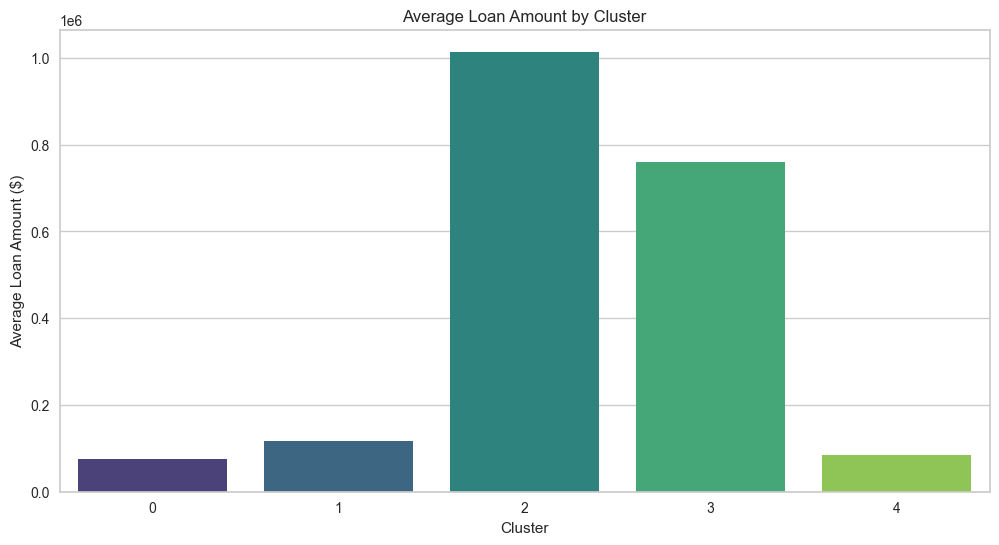

C:\Users\kevin\AppData\Local\Temp\ipykernel_42232\3485056280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["PERCENTAGE_EXPOSURE"], palette="coolwarm")


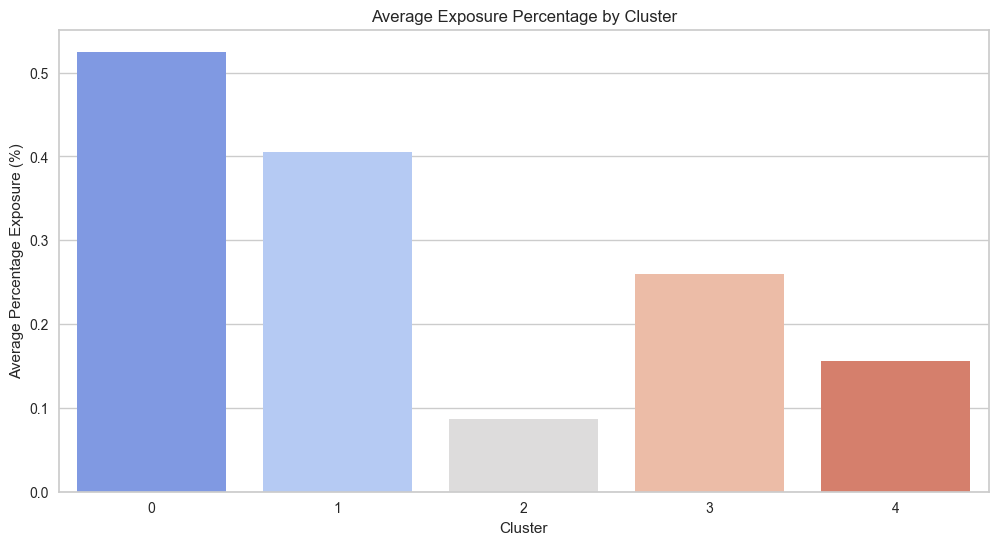

C:\Users\kevin\AppData\Local\Temp\ipykernel_42232\3485056280.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["CHARGE_OFF_AMOUNT"], palette="magma")


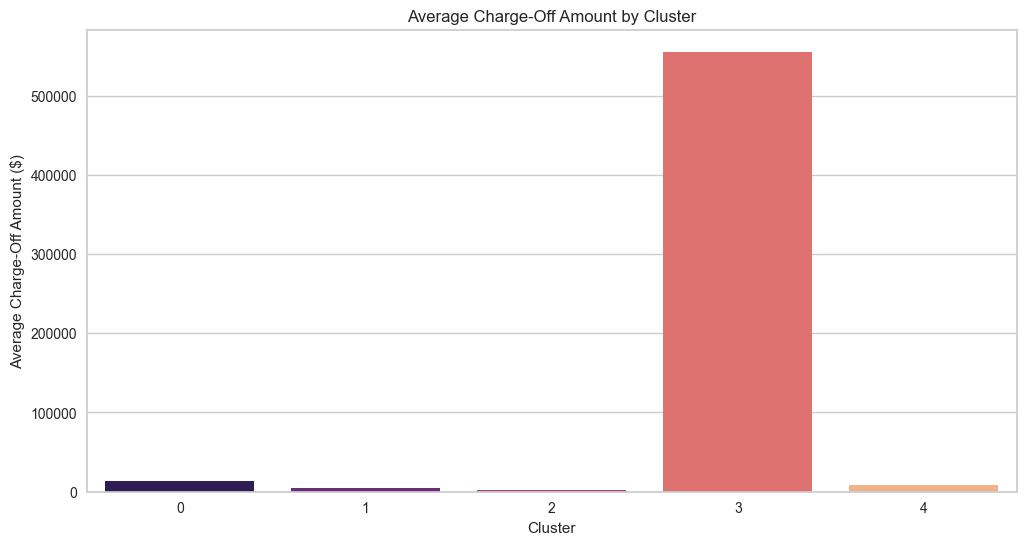

C:\Users\kevin\AppData\Local\Temp\ipykernel_42232\3485056280.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["EMPLOYEE_COUNT"], palette="Blues")


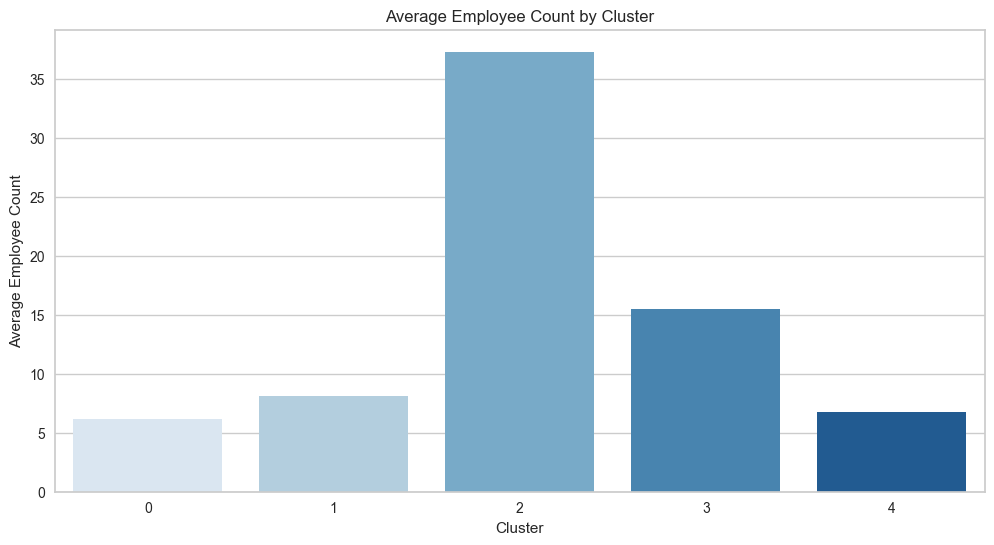

In [13]:
cluster_summary = full_ld_df.groupby("Cluster").agg({
    "LOAN_AMOUNT": "mean",
    "PERCENTAGE_EXPOSURE": "mean",
    "CHARGE_OFF_AMOUNT": "mean",
    "EMPLOYEE_COUNT": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["LOAN_AMOUNT"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Loan Amount ($)")
plt.title("Average Loan Amount by Cluster")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["PERCENTAGE_EXPOSURE"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Average Percentage Exposure (%)")
plt.title("Average Exposure Percentage by Cluster")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["CHARGE_OFF_AMOUNT"], palette="magma")
plt.xlabel("Cluster")
plt.ylabel("Average Charge-Off Amount ($)")
plt.title("Average Charge-Off Amount by Cluster")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_summary["Cluster"], y=cluster_summary["EMPLOYEE_COUNT"], palette="Blues")
plt.xlabel("Cluster")
plt.ylabel("Average Employee Count")
plt.title("Average Employee Count by Cluster")
plt.show()

In [14]:
cluster_summary.head(10)

,Cluster,LOAN_AMOUNT,PERCENTAGE_EXPOSURE,CHARGE_OFF_AMOUNT,EMPLOYEE_COUNT
0,0,7.550067e+04,0.524898,12954.224469,6.185433
1,1,1.178232e+05,0.405057,5213.372244,8.088465
2,2,1.014004e+06,0.086371,2286.340457,37.295708
3,3,7.608701e+05,0.259332,555394.944879,15.489758
4,4,8.542344e+04,0.155644,7903.315324,6.752456
